## Import Libraries

In [1]:
"""
!pip install ydata-profiling
!pip install sweetviz
"""

'\n!pip install ydata-profiling\n!pip install sweetviz\n'

In [2]:
"""
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px
#from google.colab import files
"""

'\nfrom ydata_profiling import ProfileReport\nimport sweetviz as sv\nimport plotly.express as px\n#from google.colab import files\n'

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [4]:
FootBallPlayers = pd.read_csv("final_data.csv")

In [5]:
FootBallPlayers.shape

(10754, 22)

In [6]:
FootBallPlayers.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [7]:
FootBallPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [ ]:
FootBallPlayers.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [ ]:
FootBallPlayers.describe(exclude='number')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [ ]:
"""
profile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")
profile_FootBallPlayers.to_file("FootBallPlayers_report.html")
from google.colab import files
files.download('FootBallPlayers_report.html')
profile_FootBallPlayers
"""

'\nprofile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")\nprofile_FootBallPlayers.to_file("FootBallPlayers_report.html")\nfrom google.colab import files\nfiles.download(\'FootBallPlayers_report.html\')\nprofile_FootBallPlayers\n'

In [ ]:
"""
vis_report_FootBallPlayers = sv.analyze(FootBallPlayers)
vis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"
from google.colab import files
files.download('vis_report_FootBallPlayers.html')
vis_report_FootBallPlayers.show_notebook()
"""

'\nvis_report_FootBallPlayers = sv.analyze(FootBallPlayers)\nvis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"\nfrom google.colab import files\nfiles.download(\'vis_report_FootBallPlayers.html\')\nvis_report_FootBallPlayers.show_notebook()\n'

In [ ]:
# uniqeness
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [8]:
# uniqeness
FootBallPlayers.drop_duplicates(inplace=True)
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [9]:
# Completeness
FootBallPlayers.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [ ]:
#Completeness
FootBallPlayers['name'].value_counts()

,count
name,
Paulinho,6
Vitinho,5
Guilherme,5
Fernando,4
João Pedro,4
...,...
Everson,1
Matheus Mendes,1
Gabriel Delfim,1


In [ ]:
FootBallPlayers[FootBallPlayers['name'] =='Paulinho']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3259,/paulinho/profil/spieler/1083888,Clube de Regatas Vasco da Gama,Paulinho,Defender Right-Back,172.0,18.0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,500000,500000,2,1
3628,/paulinho/profil/spieler/428791,Clube Atlético Mineiro,Paulinho,Attack-LeftWinger,177.0,22.0,47,0.287540,0.107827,0.071885,...,0.0,0.0,2504,458,55,2,7500000,25000000,4,1
3786,/paulinho/profil/spieler/57229,Sport Club Corinthians Paulista,Paulinho,midfield-CentralMidfield,183.0,34.0,8,0.450000,0.000000,0.225000,...,0.0,0.0,400,276,57,15,1200000,40000000,3,0
4016,/paulinho/profil/spieler/85771,CS Marítimo,Paulinho,Defender Right-Back,176.0,31.0,49,0.047468,0.071203,0.213608,...,0.0,0.0,3792,21,2,1,300000,1500000,2,1
4276,/paulinho/profil/spieler/211072,Sporting CP,Paulinho,Attack Centre-Forward,187.0,30.0,84,0.431334,0.297471,0.267724,...,0.0,0.0,6051,199,36,7,8000000,15000000,4,0
9139,/paulinho/profil/spieler/534473,Al-Fayha FC,Paulinho,midfield-CentralMidfield,175.0,26.0,60,0.147996,0.092497,0.277492,...,0.0,0.0,4865,0,0,0,1000000,1600000,3,0


In [ ]:
# Accurecy - types
FootBallPlayers.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [10]:
# Accurecy - Outlier
all_features = FootBallPlayers.columns.tolist()
categorical_features = ['player','name', 'team', 'position']
numerical_features = [feature for feature in all_features if feature not in categorical_features]


#numeric_features = ['height', 'age', 'appearance', 'goals','assists','goals conceded','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded']


In [11]:
len(numerical_features), len(categorical_features), len(all_features)

(18, 4, 22)

In [12]:
df=FootBallPlayers.copy()

In [13]:
df.shape

(10754, 22)

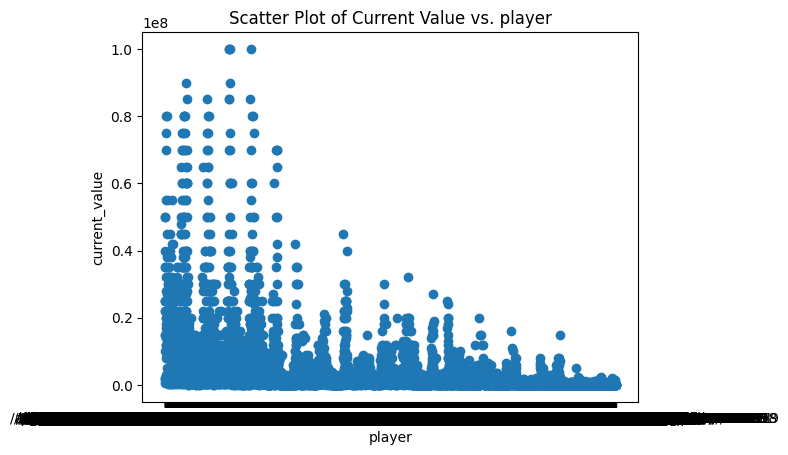

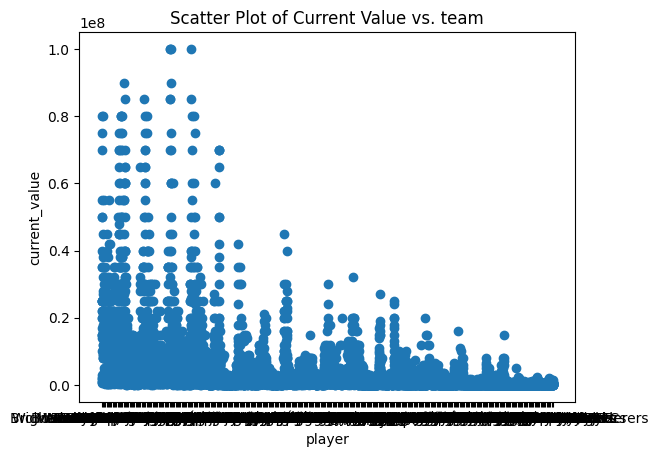

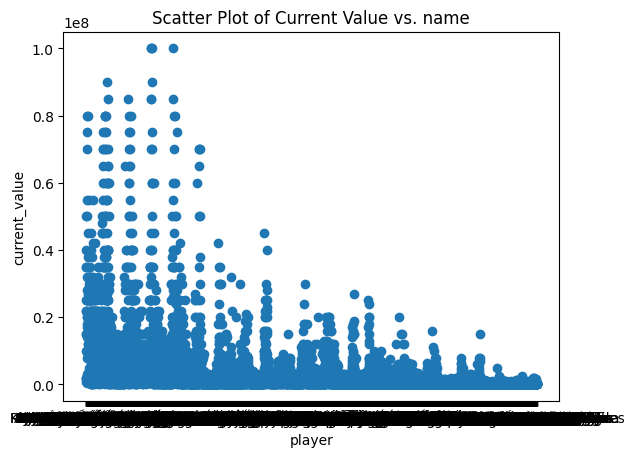

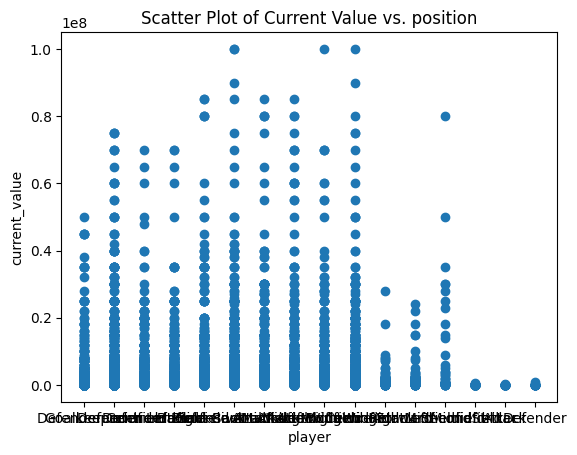

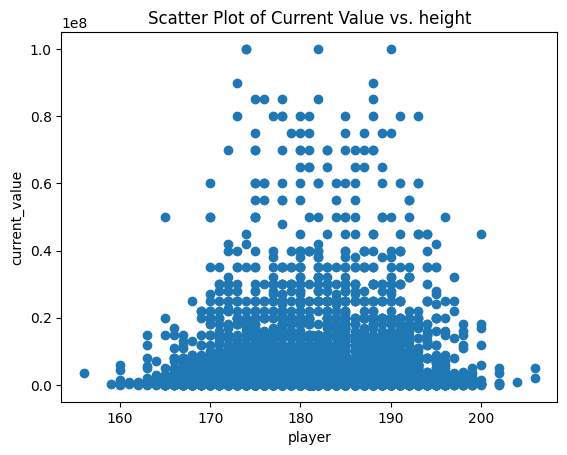

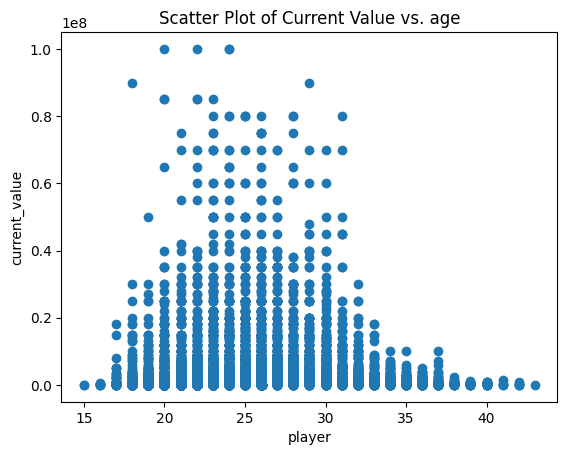

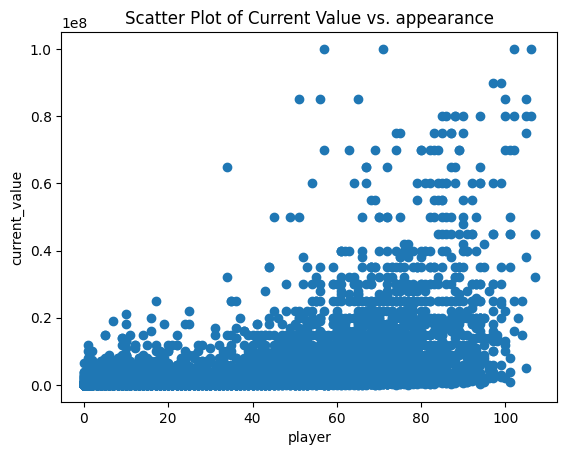

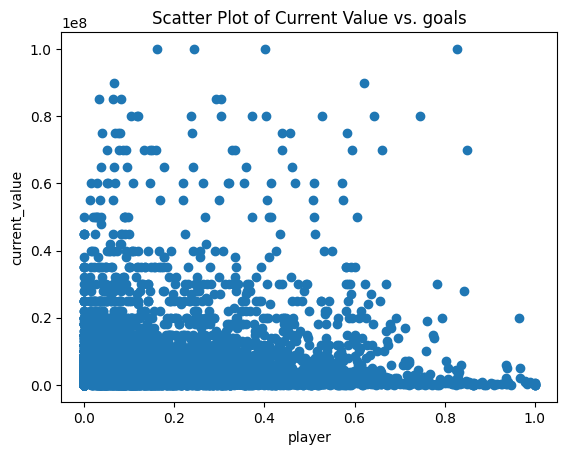

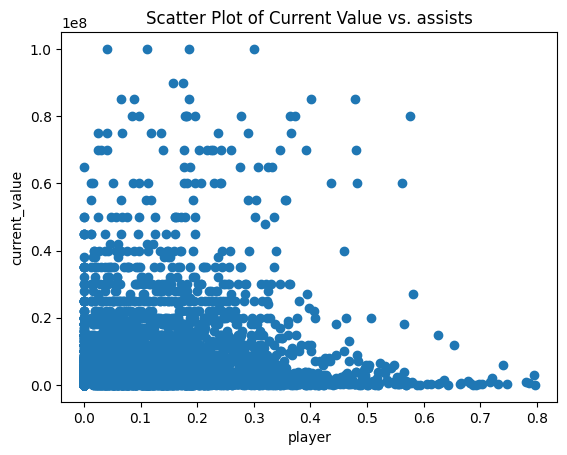

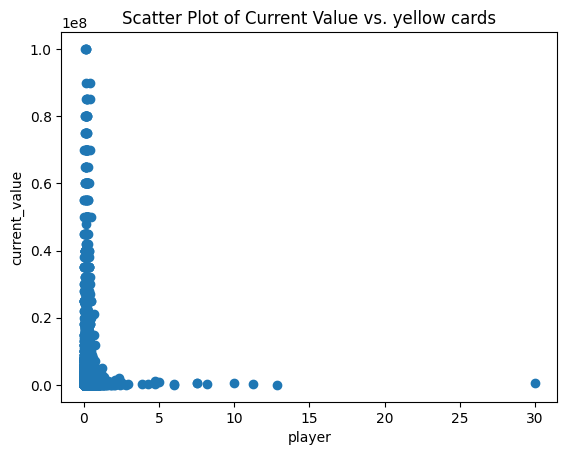

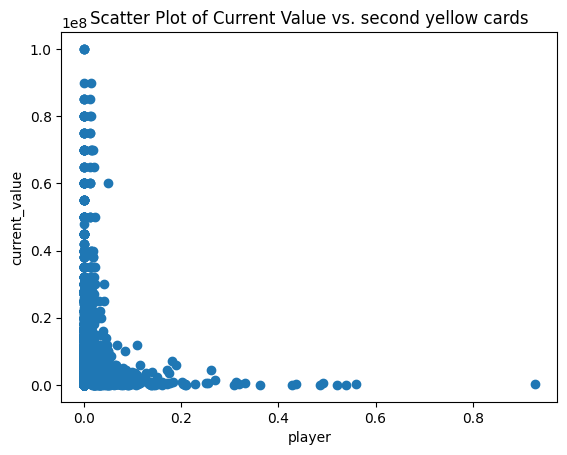

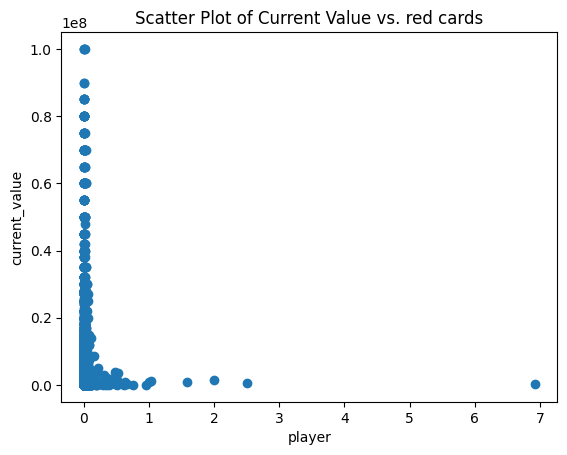

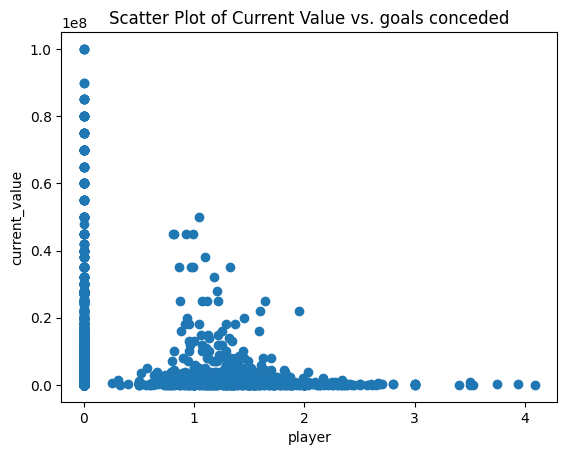

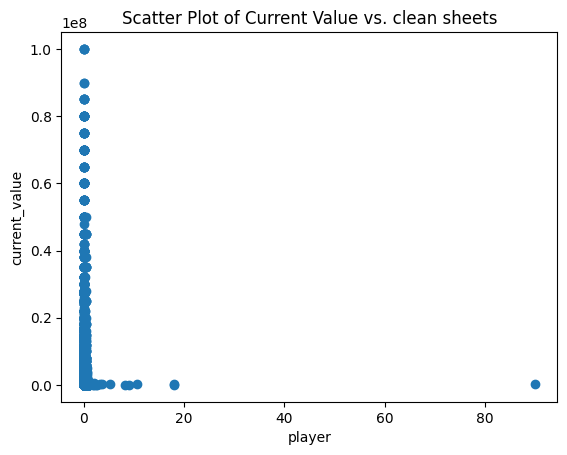

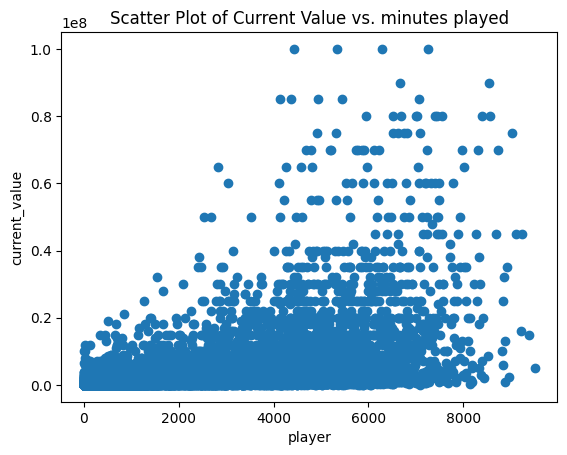

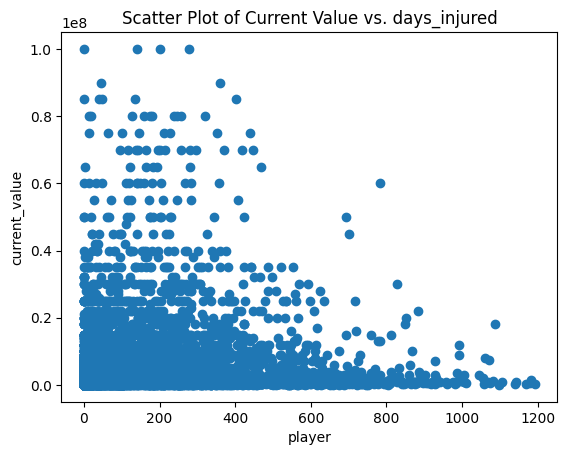

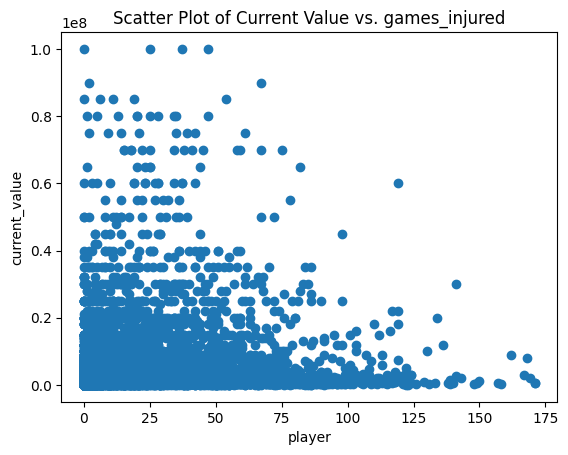

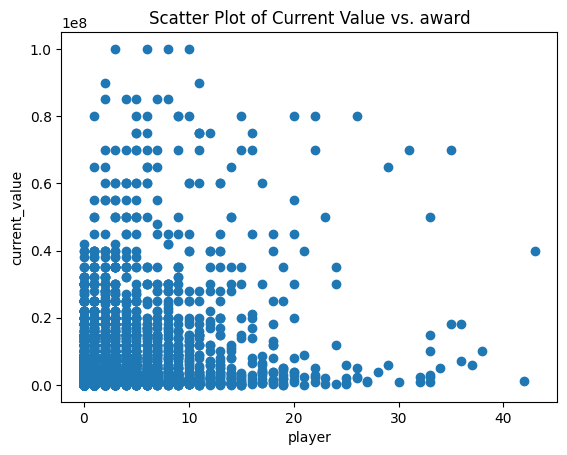

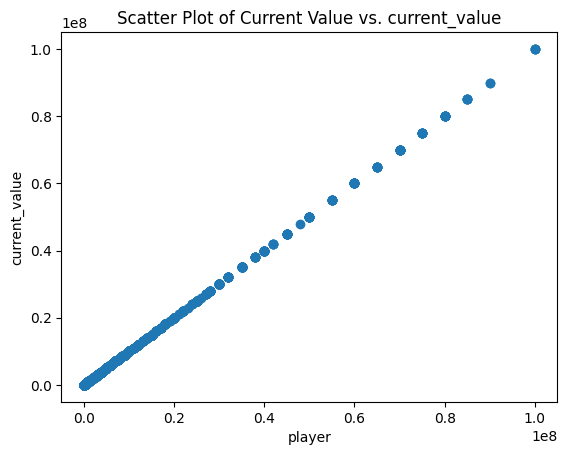

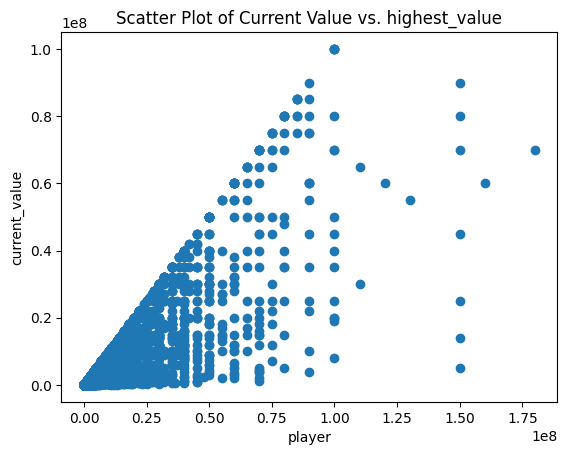

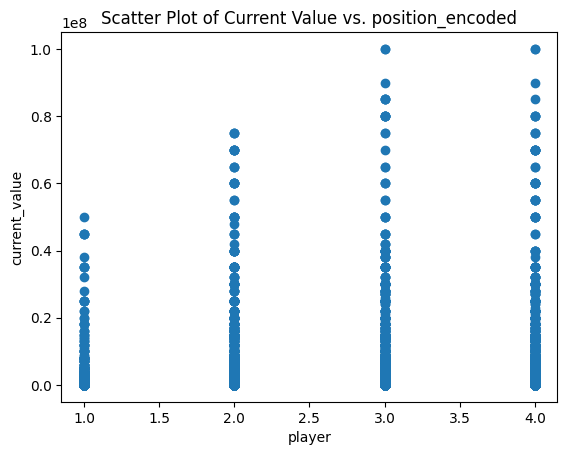

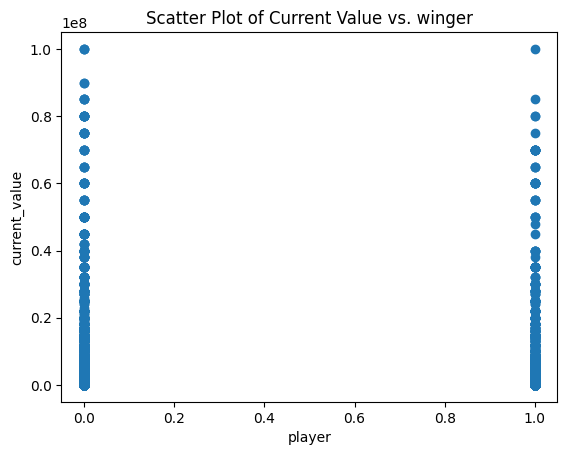

In [ ]:


for feature in selected_features:
  # Now create the scatter plot
  plt.scatter(df[feature], df['current_value'])
  plt.xlabel(feature)  # Label the x-axis with the feature name
  plt.ylabel('current_value')
  plt.title('Scatter Plot of Current Value vs. ' + feature)
  plt.show()

In [14]:
df=df[df['current_value']<=100000000]
df=df[df['current_value']>0]

In [15]:
df=df[df['goals']<=1]


In [16]:
df=df[df['assists']<=0.8]

In [17]:
df=df[df['days_injured']<=1200]

In [18]:
df=df[df['award']<=50]

In [19]:
df=df[df['goals conceded']<=5]

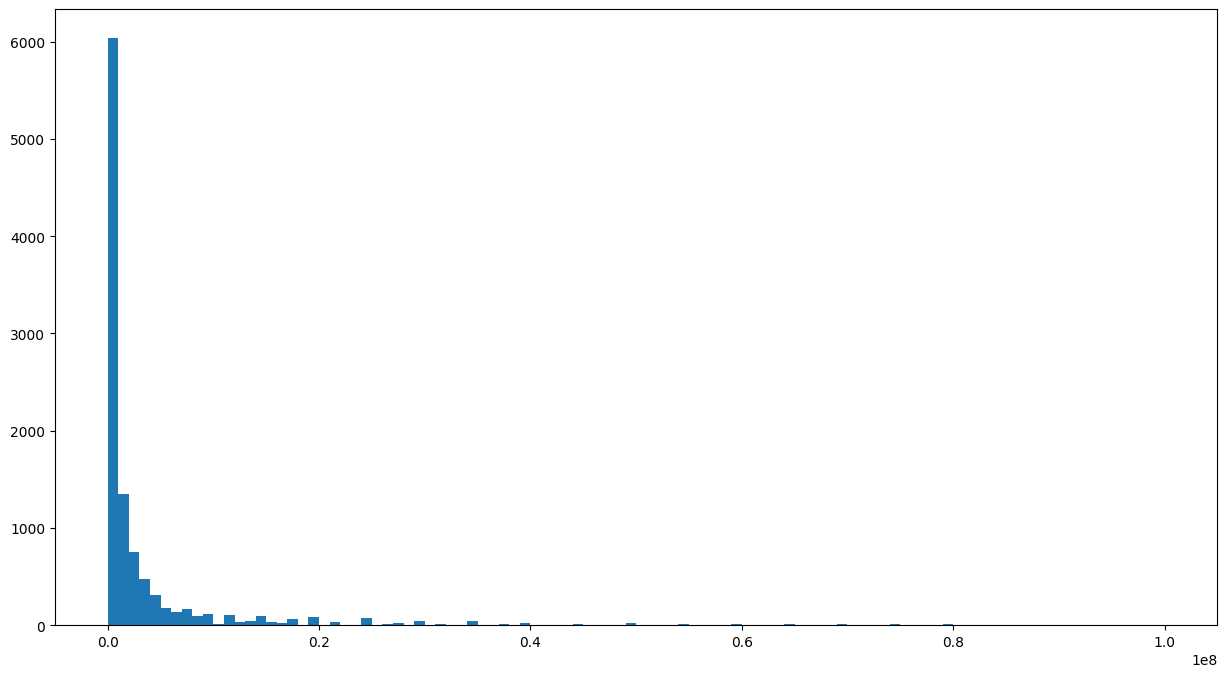

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df['current_value'], bins=100);


In [20]:
df.shape

(10476, 22)

#### 3. Feature selection

In [21]:
selected_features2 = ['height', 'age', 'appearance', 'goals','assists','goals conceded','minutes played','days_injured','games_injured','award','highest_value']

In [22]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.828919
appearance             0.431228
minutes played         0.429796
award                  0.293631
assists                0.190999
goals                  0.163745
games_injured          0.150324
days_injured           0.121088
position_encoded       0.081798
height                 0.042345
winger                 0.003091
red cards             -0.010961
clean sheets          -0.012416
yellow cards          -0.013661
second yellow cards   -0.014072
age                   -0.055378
goals conceded        -0.067395
Name: current_value, dtype: float64


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [23]:
df.shape

(10476, 22)

In [24]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

In [25]:
p35, p75

(450000.0, 3000000.0)

In [26]:


# Apply the function to create a new column
df['player_price_category'] = df['current_value'].apply(categorize_price)


df.drop('current_value', axis=1, inplace=True)
# Verify the distribution of the new categories
print(df['player_price_category'].value_counts())

player_price_category
Good_Price     4272
Cheap_Price    3535
High_Price     2669
Name: count, dtype: int64


In [27]:
numerical_features

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded',
 'winger']

In [28]:

encoder = LabelEncoder()
df['player_price_category_encoded'] = encoder.fit_transform(df['player_price_category'])

In [29]:
df['player_price_category_encoded'].value_counts()

,count
player_price_category_encoded,
1,4272
0,3535
2,2669


In [30]:
numerical_features.append('player_price_category_encoded')
numerical_features.remove('current_value')

In [31]:
df=df[numerical_features]

In [32]:
correlation = df.corr()
print(correlation['player_price_category_encoded'].sort_values(ascending=False))

player_price_category_encoded    1.000000
appearance                       0.538943
minutes played                   0.512022
highest_value                    0.499737
award                            0.250323
assists                          0.242346
games_injured                    0.233888
days_injured                     0.202276
goals                            0.193027
position_encoded                 0.137567
winger                           0.024858
height                           0.020586
yellow cards                     0.007701
age                              0.004729
second yellow cards             -0.001328
red cards                       -0.007940
clean sheets                    -0.032505
goals conceded                  -0.132275
Name: player_price_category_encoded, dtype: float64


In [33]:
# Set the correlation threshold
threshold = 0.1  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['player_price_category_encoded']) > threshold]['player_price_category_encoded'].index
selected_features.to_list()

['appearance',
 'goals',
 'assists',
 'goals conceded',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'highest_value',
 'position_encoded',
 'player_price_category_encoded']

In [34]:
selected_features.size, type(selected_features)

(11, pandas.core.indexes.base.Index)

In [35]:
df = df[selected_features]
df.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_encoded,player_price_category_encoded
0,104,0.000000,0.000000,1.217252,9390,42,5,13,70000000,1,2
1,15,0.000000,0.000000,1.242331,1304,510,58,1,22000000,1,1
2,4,0.000000,0.000000,0.616438,292,697,84,4,6000000,1,1
3,82,0.028090,0.056180,0.000000,6408,175,22,9,50000000,2,2
4,63,0.017889,0.017889,0.000000,5031,238,51,21,80000000,2,2


In [36]:
df.shape

(10476, 11)

In [ ]:
# one hot coding
#df = pd.get_dummies(df, columns=categorical_features)

#### 4. Prepare train and test data

In [37]:
# Prepare data
X = df.drop(['player_price_category_encoded'], axis=1)
y = df['player_price_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                               random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
X.shape

(10476, 10)

## Buliding the Model

In [40]:
# Import the necessary class
from sklearn.svm import SVC

# Now you can create an instance of the SVC class
svm_classifier = SVC()

In [41]:
param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 2, 5, 10, 15, 20, 25],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           verbose=1)

## Train the Model

In [42]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 2, 5, 10, 15, 20, 25], 'gamma': [1, 2, 6],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [43]:
grid_search.best_params_

{'C': 2, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
model = grid_search.best_estimator_

## Test the Model

In [45]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [ ]:
df['player_price_category_encoded'].value_counts()

In [47]:
# our benchmark model
base_model = round(df['player_price_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

40.78

### 1. Accuracy

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7137404580152672

In [49]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8597852028639618

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[508, 187,  19],
       [156, 594,  99],
       [  8, 131, 394]])

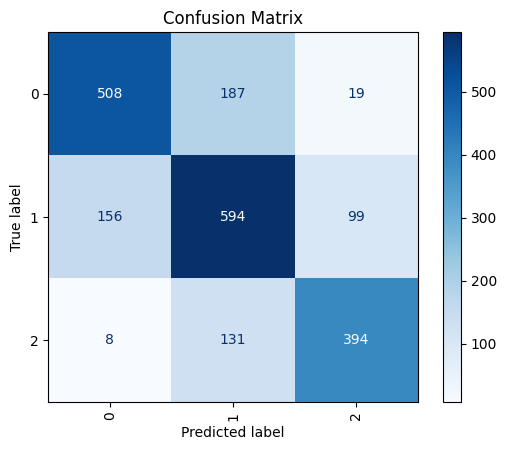

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.73


In [53]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.72


In [54]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.72


In [55]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       714
           1       0.65      0.70      0.67       849
           2       0.77      0.74      0.75       533

    accuracy                           0.71      2096
   macro avg       0.73      0.72      0.72      2096
weighted avg       0.72      0.71      0.71      2096



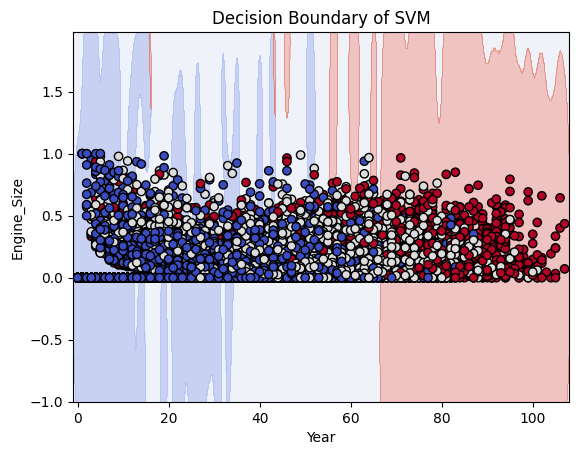

In [56]:
# Select two features from your dataset
X_two_features = X.iloc[:, [0, 1]]  # Replace with the indices of the two features you want to use

# Retrain your SVM model using these two features
model.fit(X_two_features, y)

# Now plot the decision boundary as before
h = .02  # Step size in the mesh
x_min, x_max = X_two_features.iloc[:, 0].min() - 1, X_two_features.iloc[:, 0].max() + 1
y_min, y_max = X_two_features.iloc[:, 1].min() - 1, X_two_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_two_features.iloc[:, 0], X_two_features.iloc[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Year')
plt.ylabel('Engine_Size')
plt.title('Decision Boundary of SVM')
plt.show()